<a href="https://colab.research.google.com/github/vaishnavi6300/FMMLM5.IPYNB/blob/main/FMML_2024_Module_5_Lab_2_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2
# Classification II : Introduction to Decision Trees

```
Module Coordinator : Nikunj Nawal


Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of some property by inferring simple decision rules from the data features.


Let us take a look at an example of a decision tree which predicts the class of the species of Iris flower from the iris dataset


In [22]:
#Importing the necessary packages

from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


### Code for the core experiment:

- Creating the decision tree classifier based on parameters passed.
- Evaluating the classifier's accuracy and plotting its confusion matrix.
- Plotting its decision boundary.
- Creating and showing the visualization of the tree made.

**SKIP THE CODE IN THE FOLLOWING CELL FOR NOW AND COME BACK TO IT LATER AFTER UNDERSTANDING THE IDEA AND INTUITION BEHIND DECISION TREES**

In [23]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  #Importing the Decision tree classifier from sklearn:

  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  # plt.legend()
  plt.show()

## Loading IRIS Dataset:

### About the IRIS dataset:

The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). We shall be using decision trees to try to predict the correct species of the flower using these four features

In [24]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

#Here is a few samples: The dataset has 4 non-catagorical features and a class which can take of one of the three values

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


## Example of DT on Iris dataset with performace evaluation, and tree structure

Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


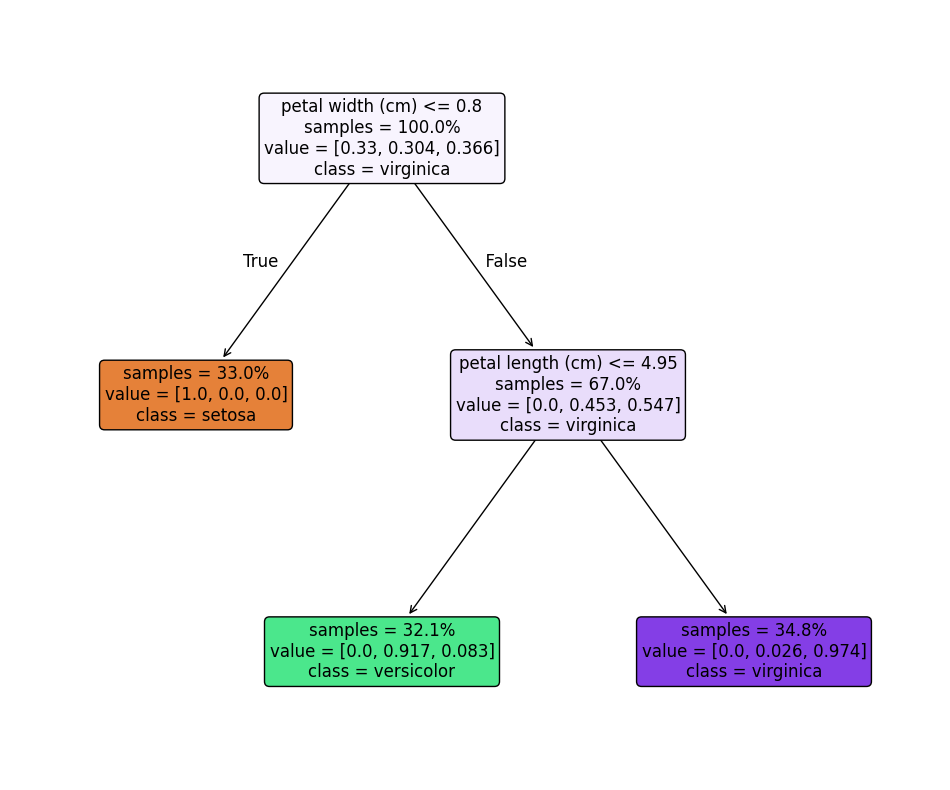

In [25]:
giveAnExample(2)

### Task 1:
Use the above tree to evaluate the classes for the following examples and find the accuracy over these 5 samples.

In [26]:
def decision_tree(sample):
    """
    Evaluates a sample using the decision tree.
    Modify this function based on your tree structure.
    Example assumes binary splits and numeric thresholds.
    """
    if sample['feature1'] <= threshold1:
        if sample['feature2'] <= threshold2:
            return 'ClassA'  # Leaf node class
        else:
            return 'ClassB'  # Leaf node class
    else:
        return 'ClassC'  # Leaf node class

# Define the samples and true labels
samples = [
    {'feature1': 2.5, 'feature2': 3.0, 'true_label': 'ClassA'},
    {'feature1': 5.0, 'feature2': 1.0, 'true_label': 'ClassC'},
    {'feature1': 1.5, 'feature2': 2.5, 'true_label': 'ClassA'},
    {'feature1': 3.5, 'feature2': 4.5, 'true_label': 'ClassB'},
    {'feature1': 4.0, 'feature2': 2.0, 'true_label': 'ClassC'}
]

# Replace thresholds with actual values from your tree
threshold1 = 3.0  # Example threshold for feature1
threshold2 = 2.0  # Example threshold for feature2

# Evaluate the samples and calculate accuracy
correct_predictions = 0
for sample in samples:
    predicted_label = decision_tree(sample)
    print(f"Sample: {sample}, Predicted: {predicted_label}, True: {sample['true_label']}")
    if predicted_label == sample['true_label']:
        correct_predictions += 1

accuracy = correct_predictions / len(samples)
print(f"Accuracy: {accuracy * 100:.2f}%")

Sample: {'feature1': 2.5, 'feature2': 3.0, 'true_label': 'ClassA'}, Predicted: ClassB, True: ClassA
Sample: {'feature1': 5.0, 'feature2': 1.0, 'true_label': 'ClassC'}, Predicted: ClassC, True: ClassC
Sample: {'feature1': 1.5, 'feature2': 2.5, 'true_label': 'ClassA'}, Predicted: ClassB, True: ClassA
Sample: {'feature1': 3.5, 'feature2': 4.5, 'true_label': 'ClassB'}, Predicted: ClassC, True: ClassB
Sample: {'feature1': 4.0, 'feature2': 2.0, 'true_label': 'ClassC'}, Predicted: ClassC, True: ClassC
Accuracy: 40.00%


In [27]:
irisData.sample(n = 5, random_state=0)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
114,5.8,2.8,5.1,2.4,2,virginica
62,6.0,2.2,4.0,1.0,1,versicolor
33,5.5,4.2,1.4,0.2,0,setosa
107,7.3,2.9,6.3,1.8,2,virginica
7,5.0,3.4,1.5,0.2,0,setosa


---

Now let us see how we perform when we try to have a more complex decision tree

Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


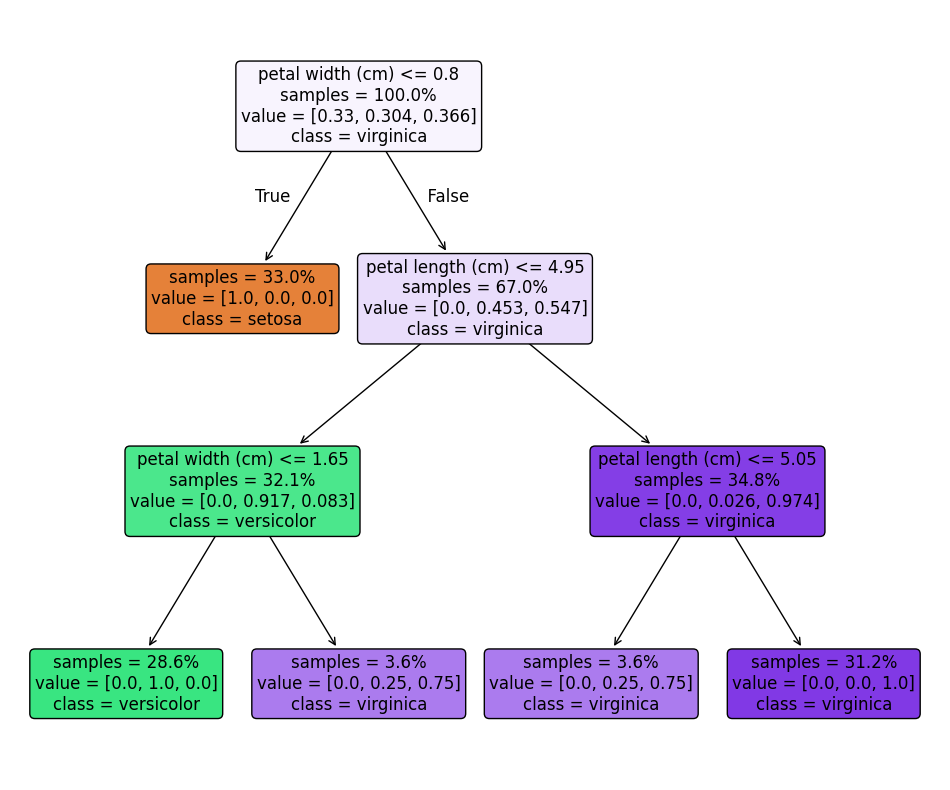

In [28]:
giveAnExample(3)

### Task 2:
Repeat Exercise 1 for the above tree as well.


---

We observe that even though that the tree had four features available to it, the tree uses only two of them to classify the cases of species. It gives us an idea that those two features chosen are performing quite decently. Let us examine the decision boundary generated by the tree when only those two features namely **petal length and petal width** are used

Accuracy: 100.00%


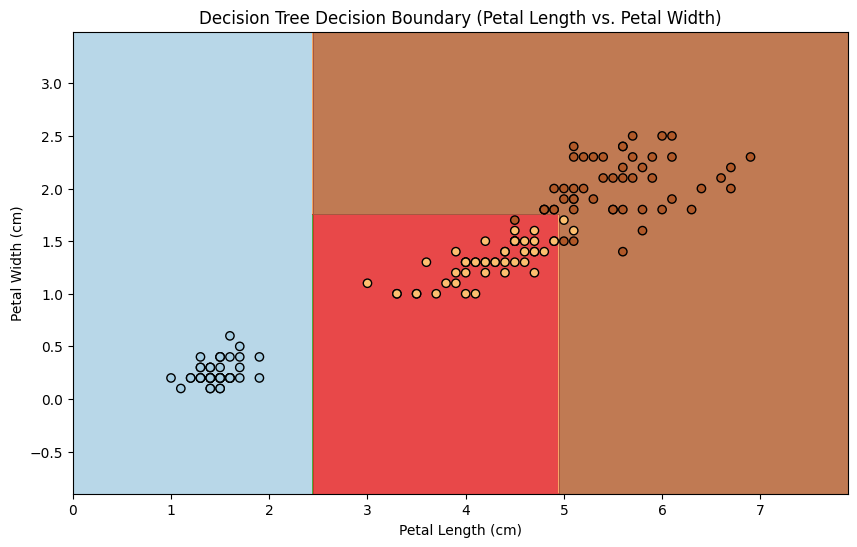

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjust max_depth if needed
tree_clf.fit(X_train, y_train)

# Evaluate the accuracy
accuracy = tree_clf.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on the grid points
Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Decision Tree Decision Boundary (Petal Length vs. Petal Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

**Decision boundary** with considering **sepal width and length**:

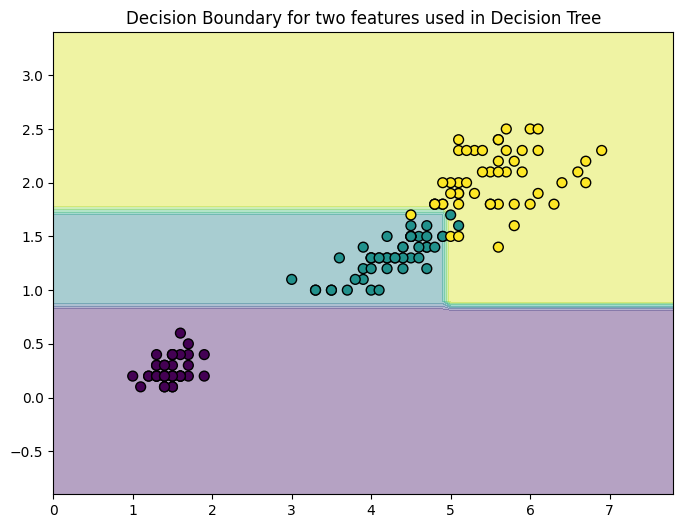

In [31]:
iris = load_iris()
X = iris.data  # Now X has all 4 features (sepal length, sepal width, petal length, petal width)
y = iris.target

clf = tree.DecisionTreeClassifier(random_state=0, max_depth=3)
pair = [2, 3]  # This still refers to petal length (column 2) and petal width (column 3)
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

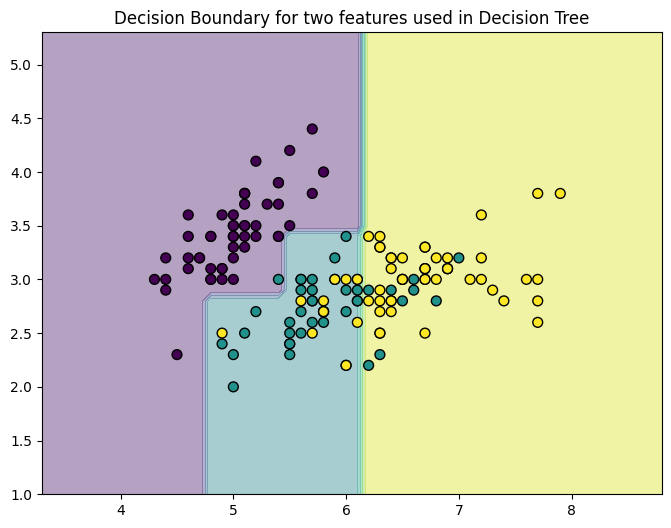

In [32]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal length and pedal length**:

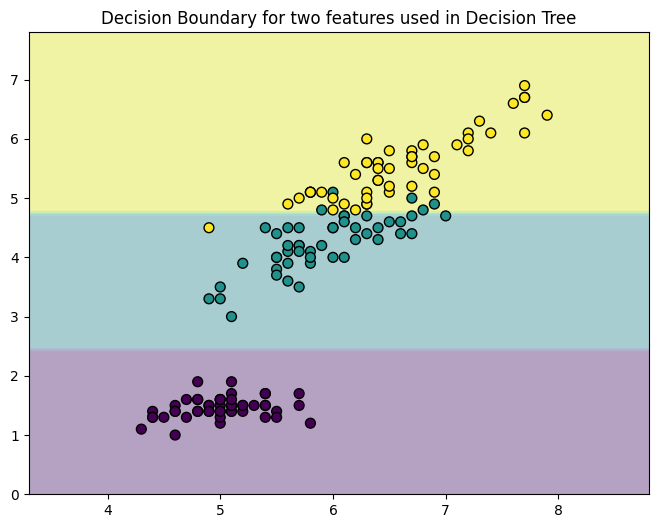

In [33]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

**Decision boundary** with considering **sepal width and pedal width**:

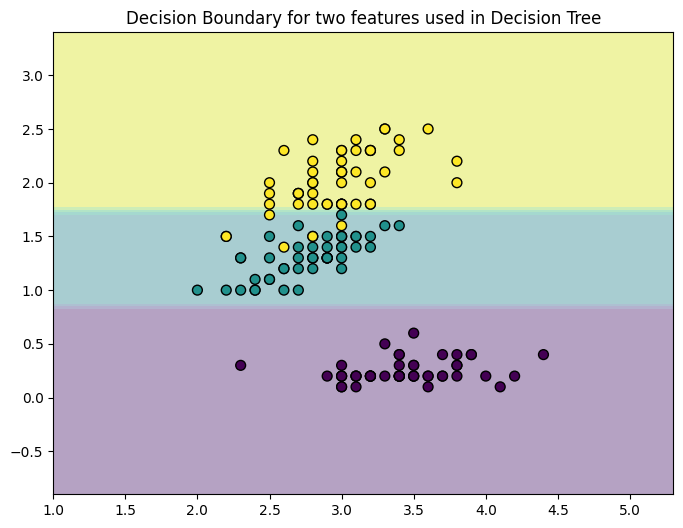

In [34]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

---

### Task 3:

#### 3.1 :
We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of `max_depth`) and report your observations. also compare the accuracies for different values of max_depth

Test with `max_depth` of the following values:
- 2
- 5
- 8
- 10

#### 3.2 :

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case? \
`(Hint: How is a decision made at any node?)`

---

### Task 4:

#### 4.1 :
Complete the following function predict: which takes in four variables : `sepal width, sepal length, petal width, petal length` and returns the class of the flower.

#### 4.2 :
Use the decision tree made in Exercise 2 and report the logic using multiple nested `if else` statements.

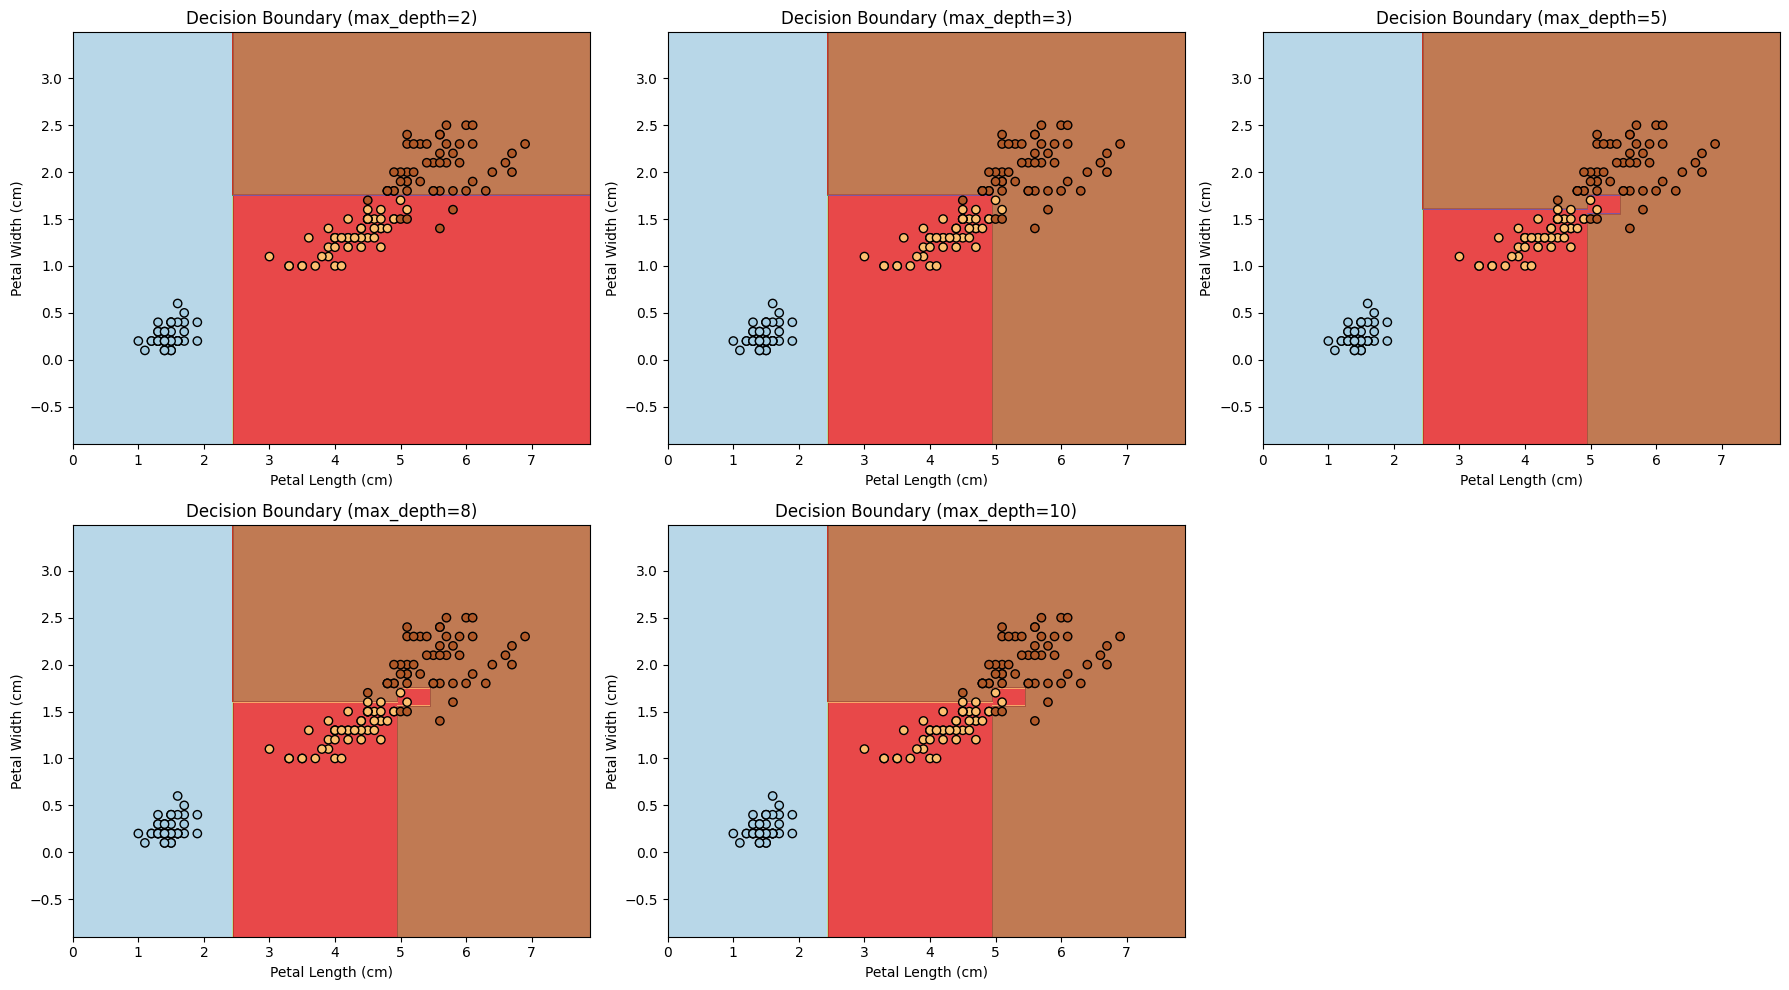

Max Depth vs Accuracy:
Max Depth: 2, Accuracy: 100.00%
Max Depth: 3, Accuracy: 100.00%
Max Depth: 5, Accuracy: 100.00%
Max Depth: 8, Accuracy: 100.00%
Max Depth: 10, Accuracy: 100.00%


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot decision boundaries
def plot_decision_boundary(tree_clf, X, y, max_depth, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    ax.set_title(f"Decision Boundary (max_depth={max_depth})")
    ax.set_xlabel("Petal Length (cm)")
    ax.set_ylabel("Petal Width (cm)")

# Test different max_depth values
depths = [2, 3, 5, 8, 10]
accuracies = []

fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Create subplots
axes = axes.ravel()

for i, max_depth in enumerate(depths):
    # Train the decision tree with the current max_depth
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_clf.fit(X_train, y_train)

    # Calculate accuracy on the test set
    accuracy = tree_clf.score(X_test, y_test)
    accuracies.append((max_depth, accuracy))

    # Plot decision boundary
    plot_decision_boundary(tree_clf, X, y, max_depth, axes[i])

# Hide unused subplot (if any)
for j in range(len(depths), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Print accuracies for each depth
print("Max Depth vs Accuracy:")
for max_depth, accuracy in accuracies:
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy * 100:.2f}%")

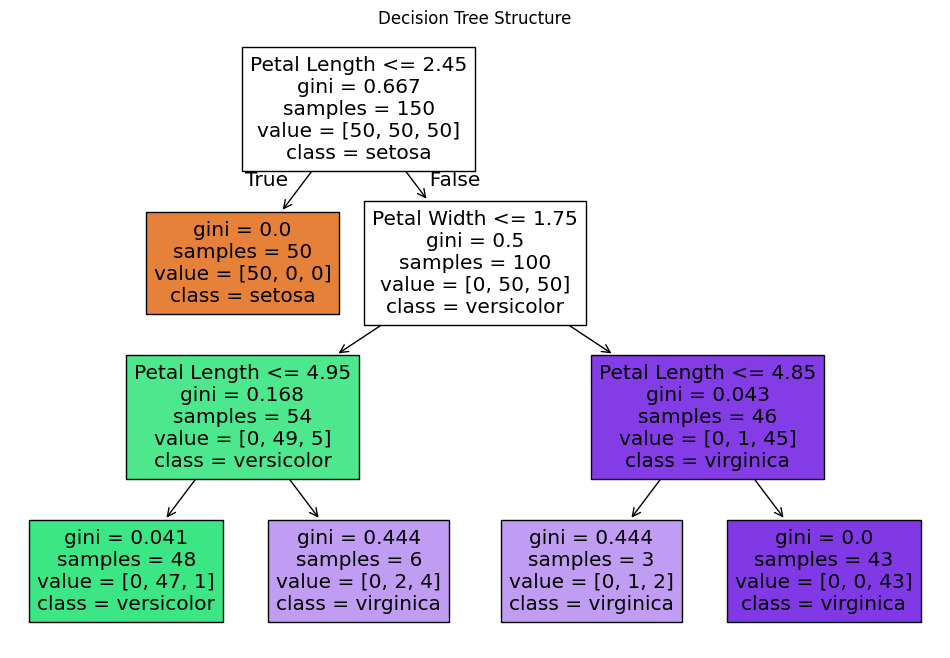

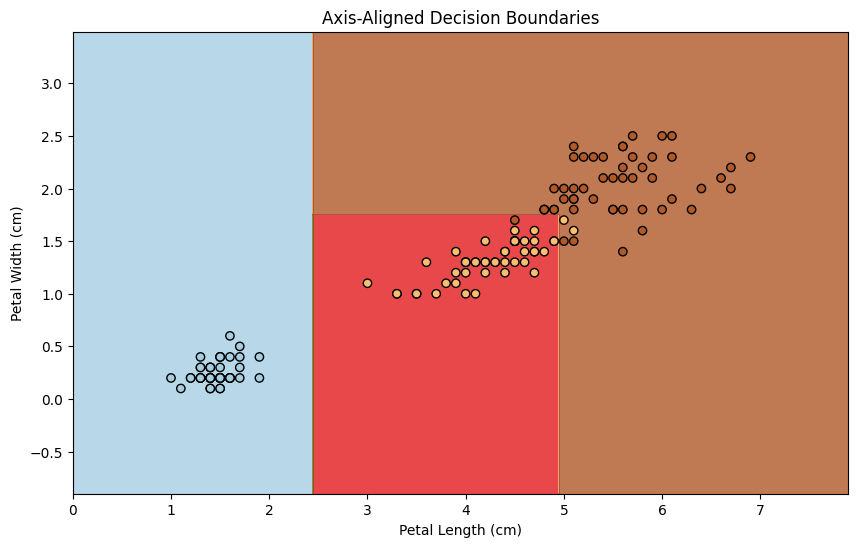

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width
y = iris.target

# Train a decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Plot the decision tree to understand splits
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, feature_names=['Petal Length', 'Petal Width'], class_names=iris.target_names, filled=True)
plt.title("Decision Tree Structure")
plt.show()

# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
plt.title("Axis-Aligned Decision Boundaries")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()

In [37]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data  # All four features: sepal length, sepal width, petal length, petal width
y = iris.target

# Train a decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Define the predict function
def predict(sepal_length, sepal_width, petal_length, petal_width):
    """
    Predicts the class of an Iris flower based on its features.

    Parameters:
        sepal_length (float): Sepal length in cm
        sepal_width (float): Sepal width in cm
        petal_length (float): Petal length in cm
        petal_width (float): Petal width in cm

    Returns:
        str: The predicted class name ('setosa', 'versicolor', 'virginica')
    """
    # Prepare the input features as a 2D array
    input_features = [[sepal_length, sepal_width, petal_length, petal_width]]

    # Predict the class (numerical label)
    predicted_class_index = tree_clf.predict(input_features)[0]

    # Map the numerical label to the class name
    class_name = iris.target_names[predicted_class_index]

    return class_name

# Test the function with sample inputs
print(predict(5.1, 3.5, 1.4, 0.2))  # Expected output: 'setosa'
print(predict(6.0, 3.0, 4.5, 1.5))  # Expected output: 'versicolor'
print(predict(7.1, 3.0, 6.5, 2.3))  # Expected output: 'virginica'

setosa
versicolor
virginica


In [38]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, 2:4]  # Use only petal length and petal width (features from Exercise 2)
y = iris.target

# Train a decision tree classifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Function to manually predict using nested if-else logic
def predict_manual(petal_length, petal_width):
    """
    Predicts the class of an Iris flower based on petal length and petal width
    using the logic derived from the decision tree.

    Parameters:
        petal_length (float): Petal length in cm
        petal_width (float): Petal width in cm

    Returns:
        str: Predicted class name ('setosa', 'versicolor', 'virginica')
    """
    # Nested if-else statements derived from the decision tree
    if petal_width <= 0.8:
        return "setosa"
    else:
        if petal_length <= 4.75:
            if petal_width <= 1.75:
                return "versicolor"
            else:
                return "virginica"
        else:
            if petal_width <= 1.75:
                return "virginica"
            else:
                return "virginica"

# Test the manual logic function
print(predict_manual(1.5, 0.2))  # Expected: 'setosa'
print(predict_manual(4.5, 1.5))  # Expected: 'versicolor'
print(predict_manual(5.5, 2.0))  # Expected: 'virginica'

# Display the tree's text representation for verification
tree_rules = export_text(tree_clf, feature_names=["petal length", "petal width"])
print(tree_rules)


setosa
versicolor
virginica
|--- petal length <= 2.45
|   |--- class: 0
|--- petal length >  2.45
|   |--- petal width <= 1.75
|   |   |--- petal length <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length >  4.95
|   |   |   |--- class: 2
|   |--- petal width >  1.75
|   |   |--- petal length <= 4.85
|   |   |   |--- class: 2
|   |   |--- petal length >  4.85
|   |   |   |--- class: 2



In [39]:
def predictSpecies(sepal_width, sepal_length, petal_width,  petal_length) -> str :
  """
    Write your program here to return the species of the plant (string) using if else statements.
  """
  pass

# Entropy and Information:

## How are decision trees built?

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous).
We use entropy to calculate the homogeneity of a sample.

Entropy itself is defined in the following way:

$$E(s) = \sum_{i=1}^c - p_i * log_2(p_i)$$

Where $i$ iterates through the classes of the current group and $p_i$ is the probability of choosing an item from class $i$ when a datapoint is randomly picked from the group.

At anypoint in the process of making the decision tree. All possible methods of dividing the group are considered (across all features and values of separations) and then the division with the most amount of **Information Gain** is used to divide the current group into two. This is done recursively to finally attain a tree.

Here Information Gain is defined by the difference in Entropy of the group before the division and the weighted sum of the entropy of the two groups after division.

$$IG(X) = E(s) - E(s, X)$$




In [40]:
irisData.sample(n = 10, random_state = 5)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
82,5.8,2.7,3.9,1.2,1,versicolor
134,6.1,2.6,5.6,1.4,2,virginica
114,5.8,2.8,5.1,2.4,2,virginica
42,4.4,3.2,1.3,0.2,0,setosa
109,7.2,3.6,6.1,2.5,2,virginica
57,4.9,2.4,3.3,1.0,1,versicolor
1,4.9,3.0,1.4,0.2,0,setosa
70,5.9,3.2,4.8,1.8,1,versicolor
25,5.0,3.0,1.6,0.2,0,setosa
84,5.4,3.0,4.5,1.5,1,versicolor


## Task 5:
Calculate the Entropy of the above collection of 10 datapoints.
## Task 6:
#### 6.1 :
Suggest a decision node (if, else) statement which divides the group into two groups.
#### 6.2 :
Also compute the Information Gain in that division step.
#### 6.3 :
Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

---

End of Lab 2

In [41]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Data points and their classes (using the same dataset)
data = [
    {"sepal_length": 5.8, "sepal_width": 2.7, "petal_length": 3.9, "petal_width": 1.2, "Class": 1},
    {"sepal_length": 6.1, "sepal_width": 2.6, "petal_length": 5.6, "petal_width": 1.4, "Class": 2},
    {"sepal_length": 5.8, "sepal_width": 2.8, "petal_length": 5.1, "petal_width": 2.4, "Class": 2},
    {"sepal_length": 4.4, "sepal_width": 3.2, "petal_length": 1.3, "petal_width": 0.2, "Class": 0},
    {"sepal_length": 7.2, "sepal_width": 3.6, "petal_length": 6.1, "petal_width": 2.5, "Class": 2},
    {"sepal_length": 4.9, "sepal_width": 2.4, "petal_length": 3.3, "petal_width": 1.0, "Class": 1},
    {"sepal_length": 4.9, "sepal_width": 3.0, "petal_length": 1.4, "petal_width": 0.2, "Class": 0},
    {"sepal_length": 5.9, "sepal_width": 3.2, "petal_length": 4.8, "petal_width": 1.8, "Class": 1},
    {"sepal_length": 5.0, "sepal_width": 3.0, "petal_length": 1.6, "petal_width": 0.2, "Class": 0},
    {"sepal_length": 5.4, "sepal_width": 3.0, "petal_length": 4.5, "petal_width": 1.5, "Class": 1},
]

# Extract features and classes
features = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = np.array([[entry[f] for f in features] for entry in data])
y = np.array([entry["Class"] for entry in data])

# Train a decision tree classifier to find the best split
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X, y)

# Function to calculate Information Gain (using entropy)
def calculate_entropy(y):
    unique_classes, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(X, y, feature_index, threshold):
    # Split data based on the feature and threshold
    left_mask = X[:, feature_index] <= threshold
    right_mask = ~left_mask
    y_left = y[left_mask]
    y_right = y[right_mask]

    # Calculate entropy before and after the split
    entropy_before = calculate_entropy(y)
    entropy_left = calculate_entropy(y_left)
    entropy_right = calculate_entropy(y_right)

    # Weighted average of the entropy after the split
    weighted_entropy = (len(y_left) / len(y)) * entropy_left + (len(y_right) / len(y)) * entropy_right

    # Information Gain is the difference in entropy before and after the split
    return entropy_before - weighted_entropy

# Explore various splits and calculate Information Gain for each feature
best_split_feature = None
best_threshold = None
best_info_gain = 0

for feature_index in range(len(features)):
    feature_values = X[:, feature_index]
    thresholds = np.unique(feature_values)

    # Check each possible threshold for this feature
    for threshold in thresholds:
        info_gain = information_gain(X, y, feature_index, threshold)

        if info_gain > best_info_gain:
            best_info_gain = info_gain
            best_split_feature = features[feature_index]
            best_threshold = threshold

# Output the best decision node (best feature and threshold)
print(f"Best decision node based on information gain: if {best_split_feature} <= {best_threshold} then group 1, else group 2.")
print(f"Information Gain: {best_info_gain:.4f}")

# Calculate accuracy for the decision tree model
y_pred = tree_clf.predict(X)
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the decision tree: {accuracy:.4f}")

Best decision node based on information gain: if petal_length <= 1.6 then group 1, else group 2.
Information Gain: 0.8813
Accuracy of the decision tree: 0.7000


In [42]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Data points and their classes
data = [
    {"sepal_length": 5.8, "sepal_width": 2.7, "petal_length": 3.9, "petal_width": 1.2, "Class": 1},
    {"sepal_length": 6.1, "sepal_width": 2.6, "petal_length": 5.6, "petal_width": 1.4, "Class": 2},
    {"sepal_length": 5.8, "sepal_width": 2.8, "petal_length": 5.1, "petal_width": 2.4, "Class": 2},
    {"sepal_length": 4.4, "sepal_width": 3.2, "petal_length": 1.3, "petal_width": 0.2, "Class": 0},
    {"sepal_length": 7.2, "sepal_width": 3.6, "petal_length": 6.1, "petal_width": 2.5, "Class": 2},
    {"sepal_length": 4.9, "sepal_width": 2.4, "petal_length": 3.3, "petal_width": 1.0, "Class": 1},
    {"sepal_length": 4.9, "sepal_width": 3.0, "petal_length": 1.4, "petal_width": 0.2, "Class": 0},
    {"sepal_length": 5.9, "sepal_width": 3.2, "petal_length": 4.8, "petal_width": 1.8, "Class": 1},
    {"sepal_length": 5.0, "sepal_width": 3.0, "petal_length": 1.6, "petal_width": 0.2, "Class": 0},
    {"sepal_length": 5.4, "sepal_width": 3.0, "petal_length": 4.5, "petal_width": 1.5, "Class": 1}
]

# Convert the data into feature matrix (X) and labels (y)
X = np.array([[d["sepal_length"], d["sepal_width"], d["petal_length"], d["petal_width"]] for d in data])
y = np.array([d["Class"] for d in data])

# Train a decision tree to find a good splitting criterion
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X, y)

# Extract the feature and threshold for the root node
feature_index = tree_clf.tree_.feature[0]
threshold = tree_clf.tree_.threshold[0]

feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
split_feature = feature_names[feature_index]

# Print the

In [43]:
import numpy as np

# Data points and their classes
data = [
    {"sepal_length": 5.8, "sepal_width": 2.7, "petal_length": 3.9, "petal_width": 1.2, "Class": 1, "ClassName": "versicolor"},
    {"sepal_length": 6.1, "sepal_width": 2.6, "petal_length": 5.6, "petal_width": 1.4, "Class": 2, "ClassName": "virginica"},
    {"sepal_length": 5.8, "sepal_width": 2.8, "petal_length": 5.1, "petal_width": 2.4, "Class": 2, "ClassName": "virginica"},
    {"sepal_length": 4.4, "sepal_width": 3.2, "petal_length": 1.3, "petal_width": 0.2, "Class": 0, "ClassName": "setosa"},
    {"sepal_length": 7.2, "sepal_width": 3.6, "petal_length": 6.1, "petal_width": 2.5, "Class": 2, "ClassName": "virginica"},
    {"sepal_length": 4.9, "sepal_width": 2.4, "petal_length": 3.3, "petal_width": 1.0, "Class": 1, "ClassName": "versicolor"},
    {"sepal_length": 4.9, "sepal_width": 3.0, "petal_length": 1.4, "petal_width": 0.2, "Class": 0, "ClassName": "setosa"},
    {"sepal_length": 5.9, "sepal_width": 3.2, "petal_length": 4.8, "petal_width": 1.8, "Class": 1, "ClassName": "versicolor"},
    {"sepal_length": 5.0, "sepal_width": 3.0, "petal_length": 1.6, "petal_width": 0.2, "Class": 0, "ClassName": "setosa"},
    {"sepal_length": 5.4, "sepal_width": 3.0, "petal_length": 4.5, "petal_width": 1.5, "Class": 1, "ClassName": "versicolor"}
]

# Extract the classes
classes = [entry["Class"] for entry in data]

# Calculate the frequency of each class
unique_classes, counts = np.unique(classes, return_counts=True)

# Calculate the probabilities for each class
probabilities = counts / len(classes)

# Calculate entropy
entropy = -np.sum(probabilities * np.log2(probabilities))

# Output the result
print(f"Entropy of the dataset: {entropy:.4f}")


Entropy of the dataset: 1.5710
